In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
# !pip install yellowbrick

In [44]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [4]:
history_data = pd.read_csv(os.path.join('Stage2_NCAA_2013T02018.csv'))
history_data.head()

,outcome,TeamID,Score,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,1,1104,70,0,25,52,6,21,14,14,8,19,14,12,8,4,16
1,1,1107,69,0,28,61,7,19,6,7,14,21,13,12,6,2,22
2,1,1114,84,0,28,61,6,17,22,30,11,28,16,14,9,4,19
3,1,1116,73,0,22,51,3,13,26,32,7,16,16,9,9,8,14
4,1,1120,61,0,22,54,3,11,14,21,12,30,10,16,10,3,17


In [5]:
#To check if the dataset is missing values
# sns.heatmap(history_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#no nulls found here in this dataset

In [6]:
# sns.set_style('whitegrid')
# sns.countplot(x='outcome', hue='Season', data=history_data, palette='RdBu_r')

In [7]:
history_data.isnull().sum()

outcome    0
TeamID     0
Score      0
NumOT      0
FGM        0
FGA        0
FGM3       0
FGA3       0
FTM        0
FTA        0
OR         0
DR         0
Ast        0
TO         0
Stl        0
Blk        0
PF         0
dtype: int64

In [8]:
history_data.columns

Index(['outcome', 'TeamID', 'Score', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3',
       'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF'],
      dtype='object')

In [9]:
# Assign X (data) and y (target)
X = history_data.drop("outcome", axis=1)
y = history_data["outcome"]
print(X.shape, y.shape)

(64410, 16) (64410,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create a support vector machine linear classifer and fit it to the training data
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
# Print the model score using the test data
print("test score: %.3f" % model.score(X_test_scaled,y_test))
predictions = model.predict(X_test_scaled)

test score: 0.884


In [15]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['Loss', 'Won']))

              precision    recall  f1-score   support

        Loss       0.88      0.89      0.88      8052
         Won       0.89      0.88      0.88      8051

    accuracy                           0.88     16103
   macro avg       0.88      0.88      0.88     16103
weighted avg       0.88      0.88      0.88     16103



In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#classifier.fit(X_train, y_train)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
X_train_scaled.shape

(48307, 16)

In [19]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8825843045521353
Testing Data Score: 0.8836862696391977


In [20]:
X_test_scaled.shape

(16103, 16)

In [21]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 1 0 1 1 0 0 1 0]
First 10 Actual labels: [1, 0, 0, 0, 1, 1, 0, 0, 1, 1]


In [22]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,0,0
2,1,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,0,1


In [23]:
temp = pd.DataFrame()

In [24]:
output_file="prediction2013_2018.csv"

In [25]:
temp['prediction'] = predictions
temp['actual'] = y_test.tolist()
temp["TeamID"]=X_test["TeamID"].tolist()

In [26]:
temp.head()

,prediction,actual,TeamID
0,1,1,1233
1,0,0,1155
2,1,0,1316
3,0,0,1235
4,1,1,1335


In [27]:
temp.to_csv(output_file,index=False)

In [28]:
temp.loc[temp['prediction'] == temp['actual'], 'True-Prediction'] = 'True'
temp.loc[temp['prediction'] != temp['actual'], 'True-Prediction'] = 'False'

In [29]:
temp.head()

,prediction,actual,TeamID,True-Prediction
0,1,1,1233,True
1,0,0,1155,True
2,1,0,1316,False
3,0,0,1235,True
4,1,1,1335,True


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8543128609575855

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8546233621064397

In [32]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.1597338484465909, 'Score'),
 (0.12710994297132122, 'DR'),
 (0.09325440920174172, 'PF'),
 (0.08788958066105121, 'FGA'),
 (0.06786230679398898, 'Ast'),
 (0.05813229801792244, 'FGM'),
 (0.055441798386006165, 'FTM'),
 (0.05182027970297889, 'TO'),
 (0.04889603114011821, 'Stl'),
 (0.04693584299955486, 'FTA'),
 (0.04619402121382315, 'TeamID'),
 (0.04267841825723385, 'FGA3'),
 (0.03874468307709956, 'OR'),
 (0.03542522201479596, 'Blk'),
 (0.02952809001329517, 'FGM3'),
 (0.01035322710247776, 'NumOT')]

In [33]:
test = pd.read_csv(os.path.join('2019.csv'))
test.head()

,outcome,TeamID,Score,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,1,1104,82,0,27,55,9,24,19,28,16,29,17,20,3,6,24
1,1,1113,102,0,33,78,10,26,26,44,20,38,11,17,3,2,26
2,1,1119,73,0,22,51,9,30,20,29,6,22,14,6,5,1,22
3,1,1120,101,0,38,74,18,38,7,14,19,23,24,13,9,8,21
4,1,1123,86,0,32,65,7,19,15,20,16,26,14,9,7,5,18


In [34]:
test.isnull().sum()

outcome    0
TeamID     0
Score      0
NumOT      0
FGM        0
FGA        0
FGM3       0
FGA3       0
FTM        0
FTA        0
OR         0
DR         0
Ast        0
TO         0
Stl        0
Blk        0
PF         0
dtype: int64

In [35]:
# X = test.drop(["outcome", "wpf"], axis=1)
X = test.drop("outcome", axis=1)
y = test["outcome"]
print(X.shape, y.shape)

(10926, 16) (10926,)


In [48]:
X.head()

,TeamID,Score,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,1104,82,0,27,55,9,24,19,28,16,29,17,20,3,6,24
1,1113,102,0,33,78,10,26,26,44,20,38,11,17,3,2,26
2,1119,73,0,22,51,9,30,20,29,6,22,14,6,5,1,22
3,1120,101,0,38,74,18,38,7,14,19,23,24,13,9,8,21
4,1123,86,0,32,65,7,19,15,20,16,26,14,9,7,5,18


In [36]:
test_predictions = classifier.predict(X)
print(f"First 10 Predictions:   {test_predictions[:10]}")
print(f"First 10 Actual labels: {y[:10].tolist()}")

First 10 Predictions:   [1 0 1 1 1 1 1 1 1 0]
First 10 Actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [37]:
print(f"Testing Data Score: {classifier.score(X, y)}")

Testing Data Score: 0.8364451766428702


In [38]:
pd.DataFrame({"Prediction": test_predictions, "Actual": y}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,1


In [39]:
temp2=pd.DataFrame({"Prediction": test_predictions, "Actual": y,"TeamID":X["TeamID"].tolist()}).reset_index(drop=True)
output_file2="prediction_for_2019.csv"
temp2.to_csv(output_file2,index=False)

In [40]:
print(f"Testing Data Score: {classifier.score(X, y)}")

Testing Data Score: 0.8364451766428702


In [41]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['Loss', 'Won']))

              precision    recall  f1-score   support

        Loss       0.88      0.89      0.88      8052
         Won       0.89      0.88      0.88      8051

    accuracy                           0.88     16103
   macro avg       0.88      0.88      0.88     16103
weighted avg       0.88      0.88      0.88     16103



In [42]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y, test_predictions,
                            target_names=['Loss', 'Won']))

              precision    recall  f1-score   support

        Loss       0.86      0.80      0.83      5463
         Won       0.81      0.87      0.84      5463

    accuracy                           0.84     10926
   macro avg       0.84      0.84      0.84     10926
weighted avg       0.84      0.84      0.84     10926



In [45]:
from sklearn.metrics import confusion_matrix

log_cfm = confusion_matrix(y_test, predictions)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[7132  920]
 [ 953 7098]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


In [46]:
log_cfm = confusion_matrix(y, test_predictions)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[4363 1100]
 [ 687 4776]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


# Radar Charts for Dream Team predictions

In [47]:
dream_team = pd.read_csv(os.path.join('DreamTeam.csv'))
dream_team.head()

,TeamID,Score,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,111,82,0,27,55,9,24,19,28,16,29,17,20,3,6,24
1,101,102,0,33,78,10,26,26,44,20,38,11,17,3,2,26
2,110,60,0,21,51,8,25,10,12,3,26,17,6,5,5,11
3,100,53,0,19,56,7,19,8,10,13,30,9,11,2,7,16


In [49]:
dream_team.shape

(4, 16)

In [57]:
theta = list(dream_team)
theta

['TeamID',
 'Score',
 'NumOT',
 'FGM',
 'FGA',
 'FGM3',
 'FGA3',
 'FTM',
 'FTA',
 'OR',
 'DR',
 'Ast',
 'TO',
 'Stl',
 'Blk',
 'PF']

In [81]:
values0 = dream_team.iloc[0].tolist()
values0 += values0 [:1]
values0

[111, 82, 0, 27, 55, 9, 24, 19, 28, 16, 29, 17, 20, 3, 6, 24, 111]

In [82]:
values1 = dream_team.iloc[1].tolist()
values1 += values1 [:1]
values1

[101, 102, 0, 33, 78, 10, 26, 26, 44, 20, 38, 11, 17, 3, 2, 26, 101]

In [83]:
values2 = dream_team.iloc[2].tolist()
values2 += values2 [:1]
values2

[110, 60, 0, 21, 51, 8, 25, 10, 12, 3, 26, 17, 6, 5, 5, 11, 110]

In [84]:
values3 = dream_team.iloc[3].tolist()
values3 += values3 [:1]
values3

[100, 53, 0, 19, 56, 7, 19, 8, 10, 13, 30, 9, 11, 2, 7, 16, 100]

In [69]:
from math import pi
angles = [n / float(len(theta)) * 2 * pi for n in range(len(theta))]
angles += angles [:1]

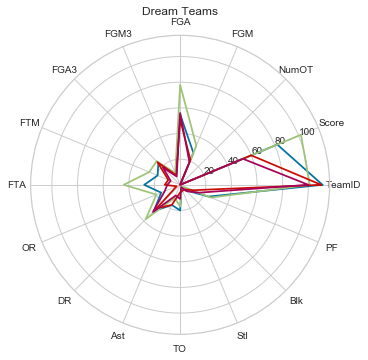

In [90]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],theta)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values0)
ax.plot(angles,values1)
ax.plot(angles,values2)
ax.plot(angles,values3)

#Fill in the area plotted in the last line
# ax.fill(angles, values0, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Dream Teams")
plt.show()

In [80]:
teams = dream_team["TeamID"].tolist()

get_predictions = classifier.predict(dream_team)
print(f"Predictions:   {get_predictions}")
print(f"Team IDs:   {teams}")



Predictions:   [1 0 0 0]
Team IDs:   [111, 101, 110, 100]
